# 12. Learning Curves - Part 2
Continuing with notebook 12.1, I will now plot the learning curves for the training set size for all previously used models.

## Preprocessing

In [1]:
import pandas as pd
from preprocessing import PreProcessor

pp = PreProcessor()

df = pd.read_csv('Structured_DataFrame_Sample_500_Main_Categories.csv', index_col=0)
df['Item Description'] = df['Item Description'].apply(lambda d: pp.preprocess(str(d)))

print(df.shape)
print('Number of unique categories: ' + str(len(df.Category.unique())))

(4500, 3)
Number of unique categories: 9


## Vectorizing and splitting

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(min_df=20, ngram_range=(1, 2))
features = tfidf.fit_transform(df['Item Description'])
labels = df.category_id

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

## Creating a learning curve method

In [3]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

training_sizes = [500, 750, 1000, 1500, 2000, 2500, 3000, 3600]

def plotLearningCurve(model, modelName):
    train_sizes, train_scores, validation_scores = learning_curve(estimator = model, X = features, y = labels, 
                                                                  train_sizes = training_sizes, cv = 5, 
                                                                  scoring = 'neg_mean_squared_error')
    
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    
    plt.style.use('seaborn-bright')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 12) # Mean Squared Error
    plt.xlabel('Training set size', fontsize = 12)
    plt.title('Learning curves for ' + modelName, fontsize = 16)
    plt.legend()
    plt.show()

## Creating the models

In [15]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

linearSVCModel = LinearSVC()
randomForestClassifierModel = RandomForestClassifier(n_estimators=200, max_depth=9, random_state=0)
multinomialNBModel = MultinomialNB()
logisticRegressionModel = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
SGDClassifierModel = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-5, max_iter=1000, tol=1e-3)

## Plotting the learning curves

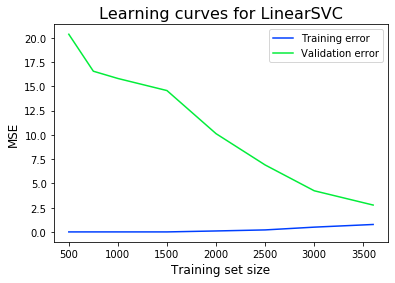

In [12]:
plotLearningCurve(linearSVCModel, 'LinearSVC')

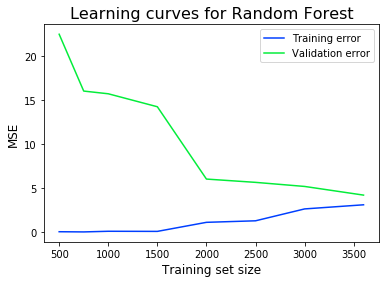

In [13]:
plotLearningCurve(randomForestClassifierModel, 'Random Forest')

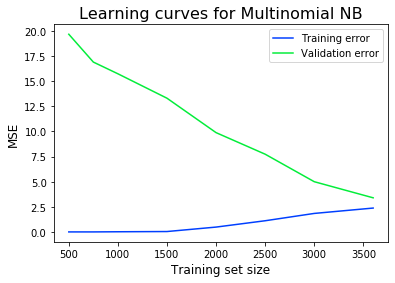

In [7]:
plotLearningCurve(multinomialNBModel, 'Multinomial NB')

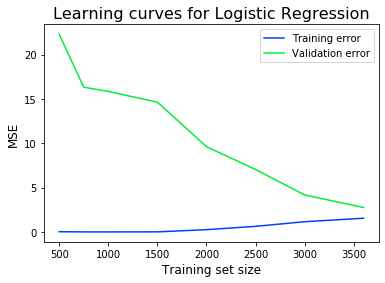

In [16]:
plotLearningCurve(logisticRegressionModel, 'Logistic Regression')

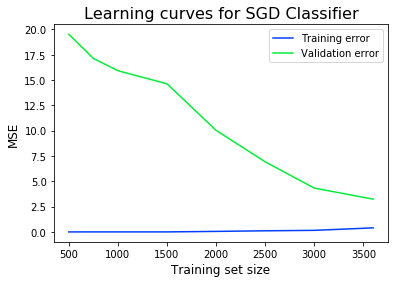

In [9]:
plotLearningCurve(SGDClassifierModel, 'SGD Classifier')